In [219]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import utils.deck_importer as di
import utils.deck_compiler as dc


# Import deck

In [221]:
deck_path: str = './decks/commander/deck.txt'
deck_importer = di.DeckImporter()
deck_df = deck_importer.mtga_importer(deck_path, format='commander')
deck_df.head()

Importing...
Path: ./decks/commander/deck.txt


,card,qty,commander
0,"Lathril, Blade of the Elves",1,True
1,Abomination of Llanowar,1,False
2,Arbor Elf,1,False
3,Beast Whisperer,1,False
4,Canopy Tactician,1,False


## Compile complete deck list with all card details

In [222]:
deck_compiler = dc.DeckCompiler()
compiled_df = deck_compiler.get_scryfall(deck_df)
compiled_df.head()

Number of cards: 83


,card,qty,commander,highres_image,mana_cost,cmc,type_line,oracle_text,colors,color_identity,produced_mana,keywords,legalities
0,"Lathril, Blade of the Elves",1,True,True,{2}{B}{G},4.0,Legendary Creature — Elf Noble,"Menace\nWhenever Lathril, Blade of the Elves d...","[B, G]","[B, G]",None,[Menace],"{'standard': 'not_legal', 'future': 'not_legal..."
1,Abomination of Llanowar,1,False,True,{1}{B}{G},3.0,Legendary Creature — Elf Horror,Vigilance; menace (This creature can't be bloc...,"[B, G]","[B, G]",None,"[Vigilance, Menace]","{'standard': 'not_legal', 'future': 'not_legal..."
2,Arbor Elf,1,False,False,{G},1.0,Creature — Elf Druid,{T}: Untap target Forest.,[G],[G],None,[],"{'standard': 'not_legal', 'future': 'not_legal..."
3,Beast Whisperer,1,False,True,{2}{G}{G},4.0,Creature — Elf Druid,"Whenever you cast a creature spell, draw a card.",[G],[G],None,[],"{'standard': 'not_legal', 'future': 'not_legal..."
4,Canopy Tactician,1,False,True,{3}{G},4.0,Creature — Elf Warrior,Other Elves you control get +1/+1.\n{T}: Add {...,[G],[G],[G],[],"{'standard': 'not_legal', 'future': 'not_legal..."


In [223]:
compiled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   card            83 non-null     object 
 1   qty             83 non-null     object 
 2   commander       83 non-null     bool   
 3   highres_image   83 non-null     bool   
 4   mana_cost       83 non-null     object 
 5   cmc             83 non-null     float64
 6   type_line       83 non-null     object 
 7   oracle_text     83 non-null     object 
 8   colors          83 non-null     object 
 9   color_identity  83 non-null     object 
 10  produced_mana   83 non-null     object 
 11  keywords        83 non-null     object 
 12  legalities      83 non-null     object 
dtypes: bool(2), float64(1), object(10)
memory usage: 7.4+ KB


# Stats

### Land Count

In [224]:
print(f"Number of lands: {sum(compiled_df['type_line'].str.lower().str.contains('land'))}")

Number of lands: 16


# Visuals

## Data pre-processing 

### Adding mana generated column

In [225]:
def mana_gen_search(str: str):
    return 'add {' in str.lower() 

def count_w(str:str):
    if mana_gen_search(str):
        text_in_braces=re.findall('\{W\}',str)
        return len(text_in_braces)
    else:
        return 0
        
def count_u(str:str):
    if mana_gen_search(str):
        text_in_braces=re.findall('\{U\}',str)
        return len(text_in_braces)
    else:
        return 0
        
def count_b(str:str):
    if mana_gen_search(str):
        text_in_braces=re.findall('\{B\}',str)
        return len(text_in_braces)
    else:
        return 0
        
def count_r(str:str):
    if mana_gen_search(str):
        text_in_braces=re.findall('\{R\}',str)
        return len(text_in_braces)
    else:
        return 0
        
def count_g(str:str):
    if mana_gen_search(str):
        text_in_braces=re.findall('\{G\}',str)
        return len(text_in_braces)
    else:
        return 0
        

def count_c(str:str):
    total = 0
    total += count_w(str)
    total += count_u(str)
    total += count_b(str)
    total += count_r(str)
    total += count_g(str)
    
    # text_in_braces=re.findall('\{W\}',str)
    # total += len(text_in_braces)
    return total

In [226]:
compiled_df['produce_mana_u'] = compiled_df['oracle_text'].apply(count_u)
compiled_df['produce_mana_b'] = compiled_df['oracle_text'].apply(count_b)
compiled_df['produce_mana_r'] = compiled_df['oracle_text'].apply(count_r)
compiled_df['produce_mana_w'] = compiled_df['oracle_text'].apply(count_w)
compiled_df['produce_mana_g'] = compiled_df['oracle_text'].apply(count_g)
compiled_df['produce_mana_c'] = compiled_df['oracle_text'].apply(count_c)
compiled_df['produced_mana_flag'] = (compiled_df['oracle_text'].apply(mana_gen_search)) | (compiled_df['type_line'].str.lower().str.contains('land'))


# TODO: Handle or in for mana production

compiled_df.head()



,card,qty,commander,highres_image,mana_cost,cmc,type_line,oracle_text,colors,color_identity,produced_mana,keywords,legalities,produce_mana_u,produce_mana_b,produce_mana_r,produce_mana_w,produce_mana_g,produce_mana_c,produced_mana_flag
0,"Lathril, Blade of the Elves",1,True,True,{2}{B}{G},4.0,Legendary Creature — Elf Noble,"Menace\nWhenever Lathril, Blade of the Elves d...","[B, G]","[B, G]",None,[Menace],"{'standard': 'not_legal', 'future': 'not_legal...",0,0,0,0,0,0,False
1,Abomination of Llanowar,1,False,True,{1}{B}{G},3.0,Legendary Creature — Elf Horror,Vigilance; menace (This creature can't be bloc...,"[B, G]","[B, G]",None,"[Vigilance, Menace]","{'standard': 'not_legal', 'future': 'not_legal...",0,0,0,0,0,0,False
2,Arbor Elf,1,False,False,{G},1.0,Creature — Elf Druid,{T}: Untap target Forest.,[G],[G],None,[],"{'standard': 'not_legal', 'future': 'not_legal...",0,0,0,0,0,0,False
3,Beast Whisperer,1,False,True,{2}{G}{G},4.0,Creature — Elf Druid,"Whenever you cast a creature spell, draw a card.",[G],[G],None,[],"{'standard': 'not_legal', 'future': 'not_legal...",0,0,0,0,0,0,False
4,Canopy Tactician,1,False,True,{3}{G},4.0,Creature — Elf Warrior,Other Elves you control get +1/+1.\n{T}: Add {...,[G],[G],[G],[],"{'standard': 'not_legal', 'future': 'not_legal...",0,0,0,0,3,3,True


In [227]:
compiled_df['cost_mana_u'] = compiled_df['mana_cost'].apply(lambda x: sum([s.count('U') for s in x]))
compiled_df['cost_mana_b'] = compiled_df['mana_cost'].apply(lambda x: sum([s.count('B') for s in x]))
compiled_df['cost_mana_r'] = compiled_df['mana_cost'].apply(lambda x: sum([s.count('R') for s in x]))
compiled_df['cost_mana_w'] = compiled_df['mana_cost'].apply(lambda x: sum([s.count('W') for s in x]))
compiled_df['cost_mana_g'] = compiled_df['mana_cost'].apply(lambda x: sum([s.count('G') for s in x]))

compiled_df.head()

,card,qty,commander,highres_image,mana_cost,cmc,type_line,oracle_text,colors,color_identity,...,produce_mana_r,produce_mana_w,produce_mana_g,produce_mana_c,produced_mana_flag,cost_mana_u,cost_mana_b,cost_mana_r,cost_mana_w,cost_mana_g
0,"Lathril, Blade of the Elves",1,True,True,{2}{B}{G},4.0,Legendary Creature — Elf Noble,"Menace\nWhenever Lathril, Blade of the Elves d...","[B, G]","[B, G]",...,0,0,0,0,False,0,1,0,0,1
1,Abomination of Llanowar,1,False,True,{1}{B}{G},3.0,Legendary Creature — Elf Horror,Vigilance; menace (This creature can't be bloc...,"[B, G]","[B, G]",...,0,0,0,0,False,0,1,0,0,1
2,Arbor Elf,1,False,False,{G},1.0,Creature — Elf Druid,{T}: Untap target Forest.,[G],[G],...,0,0,0,0,False,0,0,0,0,1
3,Beast Whisperer,1,False,True,{2}{G}{G},4.0,Creature — Elf Druid,"Whenever you cast a creature spell, draw a card.",[G],[G],...,0,0,0,0,False,0,0,0,0,2
4,Canopy Tactician,1,False,True,{3}{G},4.0,Creature — Elf Warrior,Other Elves you control get +1/+1.\n{T}: Add {...,[G],[G],...,0,0,3,3,True,0,0,0,0,1


In [228]:
compiled_df.columns

Index(['card', 'qty', 'commander', 'highres_image', 'mana_cost', 'cmc',
       'type_line', 'oracle_text', 'colors', 'color_identity', 'produced_mana',
       'keywords', 'legalities', 'produce_mana_u', 'produce_mana_b',
       'produce_mana_r', 'produce_mana_w', 'produce_mana_g', 'produce_mana_c',
       'produced_mana_flag', 'cost_mana_u', 'cost_mana_b', 'cost_mana_r',
       'cost_mana_w', 'cost_mana_g'],
      dtype='object')

In [229]:
test = compiled_df[(compiled_df['type_line'].str.lower().str.contains('land')) & (compiled_df['produced_mana_flag']==False)]
test.head()

,card,qty,commander,highres_image,mana_cost,cmc,type_line,oracle_text,colors,color_identity,...,produce_mana_r,produce_mana_w,produce_mana_g,produce_mana_c,produced_mana_flag,cost_mana_u,cost_mana_b,cost_mana_r,cost_mana_w,cost_mana_g


### Creating useful dataframes

In [230]:
no_lands_df = compiled_df[~compiled_df['type_line'].str.lower().str.contains('land')]
only_lands_df = compiled_df[compiled_df['type_line'].str.lower().str.contains('land')]


# only_lands_df.head(100)

### Mana curve

Standard mana curve

Text(0.5, 0, 'Mana cost')

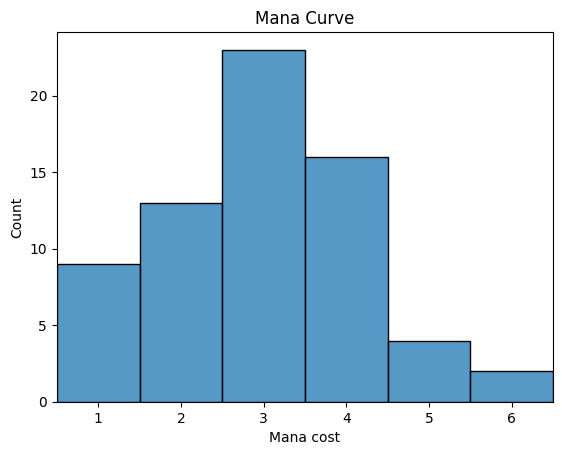

In [231]:
plt.figure(
    # figsize=(8,4)
    )
plt.margins(x=0)
plt.title('Mana Curve')

sns.histplot(
    data = compiled_df[~compiled_df['type_line'].str.lower().str.contains('land')],
    x='cmc', 
    discrete=True,
    
    )
plt.xlabel('Mana cost')


Mana curve broken down

<function matplotlib.pyplot.show(close=None, block=None)>

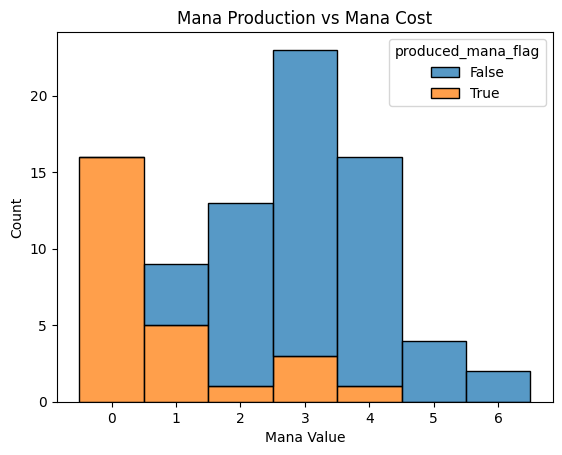

In [232]:
fig, ax = plt.subplots()

sns.histplot(
    data = compiled_df,
    x='cmc', 
    discrete=True,
    stat='count',
    ax=ax,
    hue='produced_mana_flag',
    multiple='stack',
    )

    
# ax.set_xlim([0.5,10.5])
plt.xlabel('Mana Value')
# plt.legend()
plt.title('Mana Production vs Mana Cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

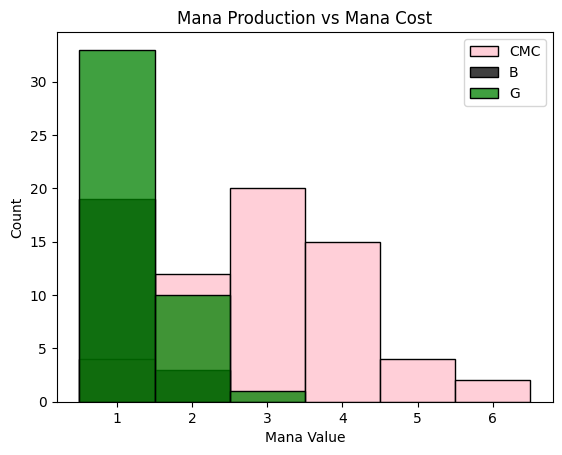

In [233]:
fig, ax = plt.subplots()

labels = dict({
'cost_mana_w': 'white',
'cost_mana_u': 'blue',
'cost_mana_b': 'black',
'cost_mana_r': 'red',
'cost_mana_g': 'green'
})

sns.histplot(
    data = compiled_df[compiled_df['produced_mana_flag']==False],
    x='cmc', 
    discrete=True,
    ax=ax,
    label='CMC',
    color='pink',
    
    )

for label, colour in labels.items():
   sns.histplot(
        data = compiled_df[(compiled_df['produced_mana_flag']==False) & (compiled_df[label]!=0)],
        x=label, 
        discrete=True,
        ax=ax,
        label=label[-1].upper(),
        color=colour,
        multiple='stack'
        )
    
# ax.set_xlim([0.5,10.5])
plt.xlabel('Mana Value')
plt.legend()
plt.title('Mana Production vs Mana Cost')
plt.show

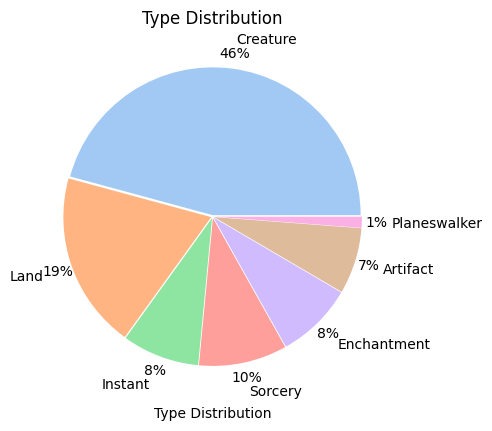

In [234]:
plt.figure()
plt.title('Type Distribution')

card_types = ['Creature', 'Land', 'Instant', 'Sorcery', 'Enchantment', 'Artifact', 'Planeswalker']
types_count = []

for card_type in card_types:
    tot = sum(compiled_df['type_line'].str.lower().str.contains(card_type.lower()))
    types_count.append(tot)
    
plt.pie(
    x=types_count,
    labels=card_types,
    pctdistance=1.1,
    labeldistance=1.2,
    colors=sns.color_palette('pastel'), 
    autopct='%.0f%%',
    explode=[0.01]*len(types_count),
    )
plt.xlabel("Type Distribution")
plt.show()

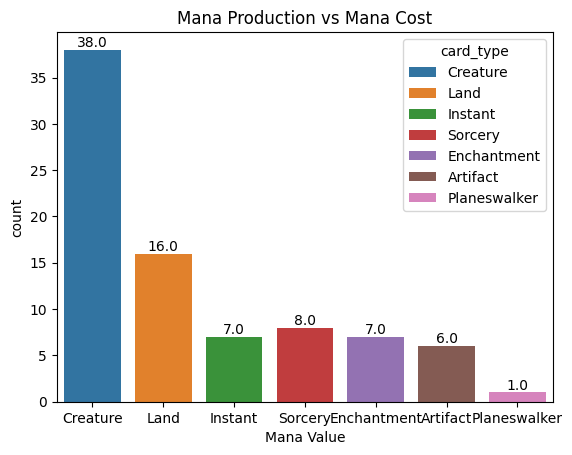

In [235]:

fig, ax = plt.subplots()

card_types = ['Creature', 'Land', 'Instant', 'Sorcery', 'Enchantment', 'Artifact', 'Planeswalker']
types_count = []

for card_type in card_types:
    tot = sum(compiled_df['type_line'].str.lower().str.contains(card_type.lower()))
    types_count.append(tot)

types_df = pd.DataFrame({'card_type': card_types, 'count': types_count})

# Plotting separate histograms for each card type
ax = sns.barplot(
        data=types_df,
        x='card_type',
        y='count',
        ax=ax,
        hue='card_type',
        dodge=False
    )
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.xlabel('Mana Value')
# plt.legend()
plt.title('Mana Production vs Mana Cost')
plt.show()